# `Visualization Resoureful Links`

https://python-graph-gallery.com/

https://www.storytellingwithdata.com/

# DECISION TRESS

In [1]:
import numpy as np 
import pandas as pd
import os

- `os` stands for operating system functionalities

- os can help to get the current working directory or change the directory

In [4]:
os.getcwd() #get or fetch the current working directory

'C:\\Users\\think\\OneDrive - Thinking Mojo\\TSLC\\Intellipaat\\Session Master\\13.Data Science IITR - 15Jun2024'

os.chdir("") #changing the working directory to a specific location 

In [6]:
os.listdir() # shows all the files in the current working directory

['.ipynb_checkpoints',
 'Decision_Trees_APC_16Jun.pdf',
 'Decision_Tress_22Jun.ipynb',
 'Intro_to_Decision_Trees_APC_16Jun.pdf',
 'Loan_Approval_Sample.xlsx',
 'Q&A_15Jun.pdf',
 'Q&A_16Jun.pdf',
 'train_dt.csv',
 'Working of Priniciple_16Jun.pdf',
 'Working Principle of DT_22Jun.pdf']

In [2]:
train_df = pd.read_csv("train_dt.csv")

In [3]:
train_df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [7]:
train_df.sample(3).T

,146,362,436
Loan_ID,LP001516,LP002175,LP002398
Gender,Female,Male,Male
Married,Yes,Yes,No
Dependents,2,0,0
Education,Graduate,Graduate,Graduate
Self_Employed,No,No,No
ApplicantIncome,14866,4750,1926
CoapplicantIncome,0.0,2333.0,1851.0
LoanAmount,70.0,130.0,50.0
Loan_Amount_Term,360.0,360.0,360.0


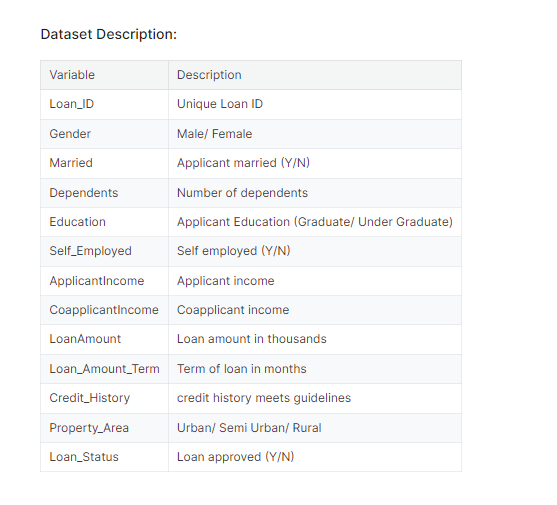

# Exploratory Data Analysis

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Check for missing data

In [9]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### `missing data in %age`

In [10]:
train_df.isna().sum()/len(train_df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

#### `Drop the missing data for this use-case`

### `dropna()`

In [11]:
train_df.dropna(inplace=True)

In [14]:
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- Observation: All the missing records have been dropped

### Check for duplicate rows

In [15]:
train_df.duplicated().sum()

0

### Let us understand the realtion between input variables and target variable

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

### Realtionship between `Gender` and `Loan Approval Rate`

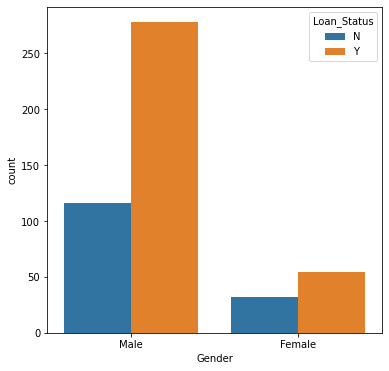

In [21]:
plt.subplots(figsize = (6,6))
sns.countplot(x=train_df['Gender'], hue=train_df['Loan_Status'])
plt.show()

In [22]:
df_summ = train_df.groupby(['Gender', 'Loan_Status']).agg(Loan_approved_Count = ('Loan_Status', 'count')).reset_index()

In [23]:
df_summ

,Gender,Loan_Status,Loan_approved_Count
0,Female,N,32
1,Female,Y,54
2,Male,N,116
3,Male,Y,278


In [24]:
df_summ_applicants = train_df.groupby(['Gender']).agg(Loan_approved_Count = ('Loan_Status', 'count')).reset_index()

In [25]:
df_summ_applicants

,Gender,Loan_approved_Count
0,Female,86
1,Male,394


### Merge the df_summ with df_sum_applicants

In [32]:
del df_summ_applicants_merged

In [33]:
df_summ_applicants_merged = df_summ.merge(df_summ_applicants, how='left', on='Gender')

In [34]:
df_summ_applicants_merged

,Gender,Loan_Status,Loan_approved_Count_x,Loan_approved_Count_y
0,Female,N,32,86
1,Female,Y,54,86
2,Male,N,116,394
3,Male,Y,278,394


In [35]:
df_summ_applicants_merged['Approval_Rejection%'] = df_summ_applicants_merged['Loan_approved_Count_x']/df_summ_applicants_merged['Loan_approved_Count_y']*100

In [36]:
df_summ_applicants_merged

,Gender,Loan_Status,Loan_approved_Count_x,Loan_approved_Count_y,Approval_Rejection%
0,Female,N,32,86,37.209302
1,Female,Y,54,86,62.790698
2,Male,N,116,394,29.441624
3,Male,Y,278,394,70.558376
